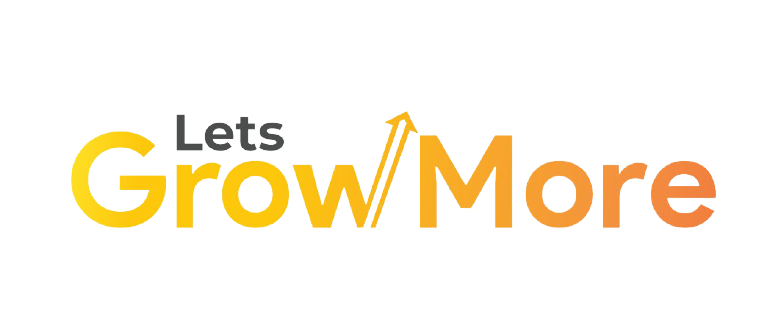

## *VIRTUAL INTERNSHIP PROGRAM*
## DATA SCIENCE TASK 5
### Task 5 -Exploratory Data Analysis on Dataset - Terrorism

The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.

Our Aim is to Explore and analyze the data to discover key findings pertaining to terrorist activities.

#### Exploratory Data Analysis

Exploratory Data Analysis (EDA) refers to the critical process of performing initial investigations on data so as to discover patterns,
to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.

### IMPORTING THE LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

### LOADING THE DATASET

In [2]:
data=pd.read_csv("C:\\Users\\Arindam\\Documents\\Downloads\\archive (11)\\globalterrorismdb_0718dist.csv",encoding='latin1')

In [3]:
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [4]:
data.columns.values

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

### DATA CLEANING 

In [5]:
data.rename(columns={'iyear':'Year','imonth':'Month','iday':"day",'gname':'Group','country_txt':'Country','region_txt':'Region','provstate':'State','city':'City','latitude':'latitude',
    'longitude':'longitude','summary':'summary','attacktype1_txt':'Attacktype','targtype1_txt':'Targettype','weaptype1_txt':'Weapon','nkill':'kill',
     'nwound':'Wound'},inplace=True)

In [6]:
#selecting necessary columns from the datset
data = data[['Year','Month','day','Country','State','Region','City','latitude','longitude',"Attacktype",'kill',
               'Wound','target1','summary','Group','Targettype','Weapon','motive']]

In [7]:
data.head()

,Year,Month,day,Country,State,Region,City,latitude,longitude,Attacktype,kill,Wound,target1,summary,Group,Targettype,Weapon,motive
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


### OBSERVING DATA

In [8]:
data.shape

(181691, 18)

In [9]:
data.isnull().sum()

Year               0
Month              0
day                0
Country            0
State            421
Region             0
City             434
latitude        4556
longitude       4557
Attacktype         0
kill           10313
Wound          16311
target1          636
summary        66129
Group              0
Targettype         0
Weapon             0
motive        131130
dtype: int64

In [10]:
#filling the missing values
data['Wound'] = data['Wound'].fillna(0)
data['kill'] = data['kill'].fillna(0)

In [11]:
data['Casualities'] = data['kill'] + data['Wound']

In [12]:
#getting information abou null count and datatype
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 19 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   day          181691 non-null  int64  
 3   Country      181691 non-null  object 
 4   State        181270 non-null  object 
 5   Region       181691 non-null  object 
 6   City         181257 non-null  object 
 7   latitude     177135 non-null  float64
 8   longitude    177134 non-null  float64
 9   Attacktype   181691 non-null  object 
 10  kill         181691 non-null  float64
 11  Wound        181691 non-null  float64
 12  target1      181055 non-null  object 
 13  summary      115562 non-null  object 
 14  Group        181691 non-null  object 
 15  Targettype   181691 non-null  object 
 16  Weapon       181691 non-null  object 
 17  motive       50561 non-null   object 
 18  Casualities  181691 non-

In [13]:
#statistical insights of data
data.describe()

,Year,Month,day,latitude,longitude,kill,Wound,Casualities
count,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181691.000000,181691.000000,181691.000000
mean,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,2.266860,2.883296,5.150156
std,13.259430,3.388303,8.814045,18.569242,2.047790e+05,11.227057,34.309747,40.555416
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,0.000000,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,0.000000,0.000000,1.000000
75%,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,2.000000,2.000000,4.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1570.000000,8191.000000,9574.000000


OBSERVATIONS:

The above data consists of terrorist activities ranging from year 1970 to 2017.

Total number of terrorist activities were 181691.

Maximum number of people killed in an event were 1570.

Maximum number of people wounded in an event were 8191.

Maximum number of total casualties in an event were 9574.

### DATA VISUALIZATION

#### Number of Attacks in each Year

In [14]:
Attacks = data["Year"].value_counts(dropna = False)
Attacks=pd.DataFrame(Attacks).reset_index().rename(columns = {"index": "Year", "Year": "Attacks"}).set_index("Year").sort_index()
Attacks.head()

,Attacks
Year,
1970,651
1971,471
1972,568
1973,473
1974,581


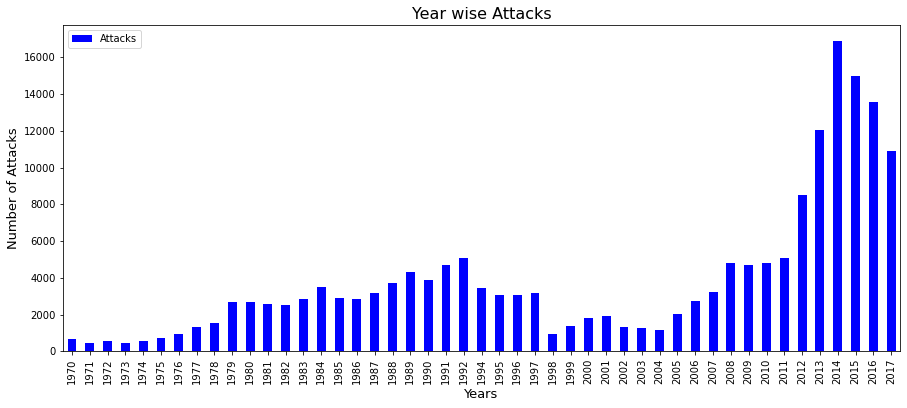

In [15]:
Attacks.plot(kind="bar", figsize = (15,6), fontsize = 10,colormap='brg')
plt.title("Year wise Attacks", fontsize = 16)
plt.xlabel("Years", fontsize = 13)
plt.ylabel("Number of Attacks", fontsize = 13)
plt.show()

Maximum Number of Attacks in 2014 : 16902

Minimum Number of Attacks in 1971 : 471

#### Total Casualities in each year 

In [16]:
Casualities= data[["Year","Casualities"]].groupby("Year").sum()
Casualities.head()

,Casualities
Year,
1970,386.0
1971,255.0
1972,975.0
1973,865.0
1974,1404.0


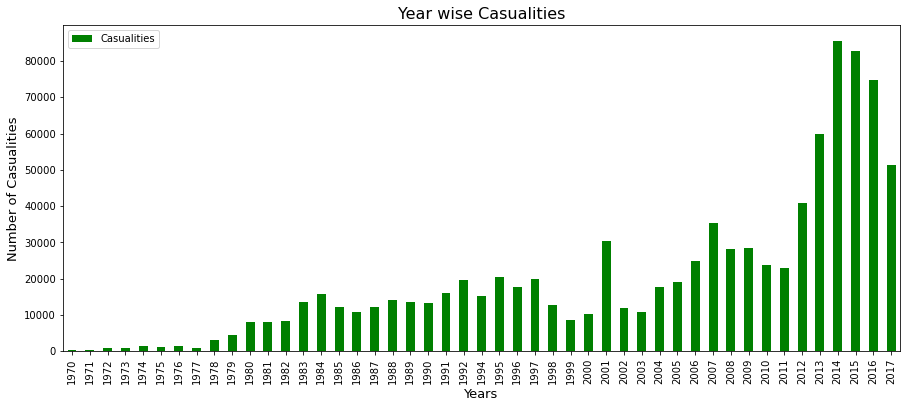

In [17]:
Casualities.plot(kind='bar',figsize=(15,6),fontsize=10,colormap="ocean")
plt.title("Year wise Casualities", fontsize = 16)
plt.xlabel("Years", fontsize = 13)
plt.ylabel("Number of Casualities", fontsize = 13)
plt.show()

Maximum Casualities in 2014

Minimum Casualities in 1970

#### People killed in each year

In [18]:
Killed= data[["Year","kill"]].groupby("Year").sum()
Killed.head()

,kill
Year,
1970,174.0
1971,173.0
1972,566.0
1973,370.0
1974,539.0


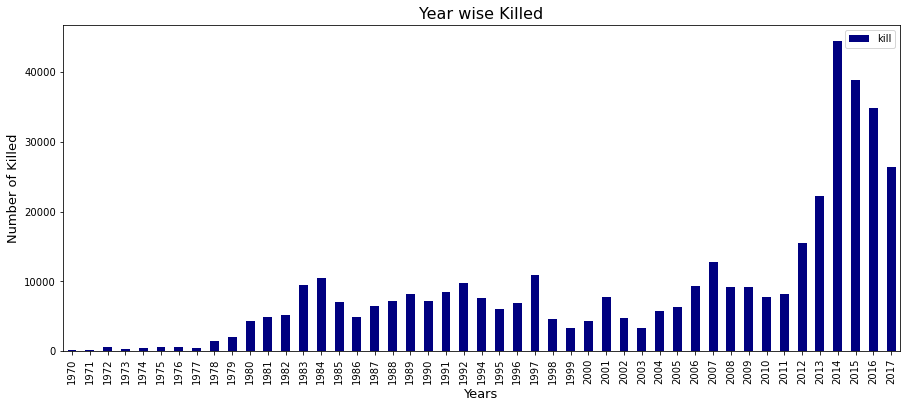

In [19]:
Killed.plot(kind='bar',figsize=(15,6),fontsize=10,colormap="jet")
plt.title("Year wise Killed", fontsize = 16)
plt.xlabel("Years", fontsize = 13)
plt.ylabel("Number of Killed", fontsize = 13)
plt.show()

Maximum people killed in 2014

Minimum people killed in 1970

#### People wounded in each year

In [20]:
Wounded= data[["Year","Wound"]].groupby("Year").sum()
Wounded.head()

,Wound
Year,
1970,212.0
1971,82.0
1972,409.0
1973,495.0
1974,865.0


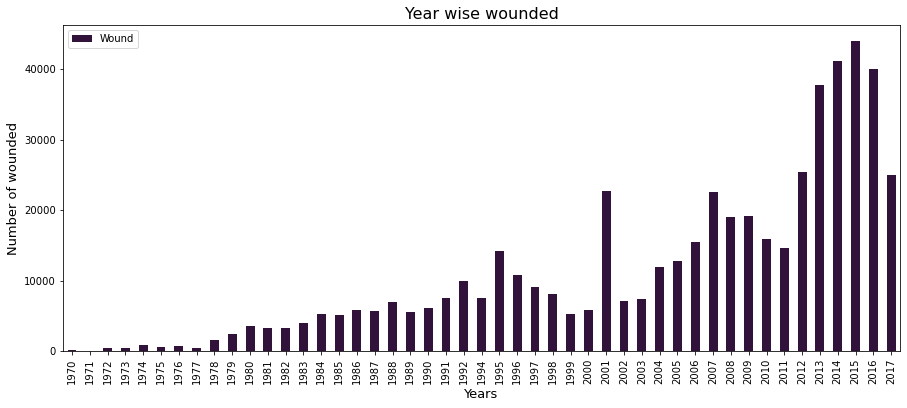

In [21]:
Wounded.plot(kind='bar',figsize=(15,6),fontsize=10,colormap="turbo")
plt.title("Year wise wounded", fontsize = 16)
plt.xlabel("Years", fontsize = 13)
plt.ylabel("Number of wounded", fontsize = 13)
plt.show()

Maximum people wounded in 2015

Minimum people killed in 1971

####  Distribution of terrorist attacks over regions from1970-2017

In [22]:
Region = pd.crosstab(data.Year, data.Region)
Region.head()

Region,Australasia & Oceania,Central America & Caribbean,Central Asia,East Asia,Eastern Europe,Middle East & North Africa,North America,South America,South Asia,Southeast Asia,Sub-Saharan Africa,Western Europe
Year,,,,,,,,,,,,
1970,1,7,0,2,12,28,472,65,1,10,3,50
1971,1,5,0,1,5,55,247,24,0,6,2,125
1972,8,3,0,0,1,53,73,33,1,16,4,376
1973,1,6,0,2,1,19,64,83,1,2,4,290
1974,1,11,0,4,2,42,111,81,2,3,7,317


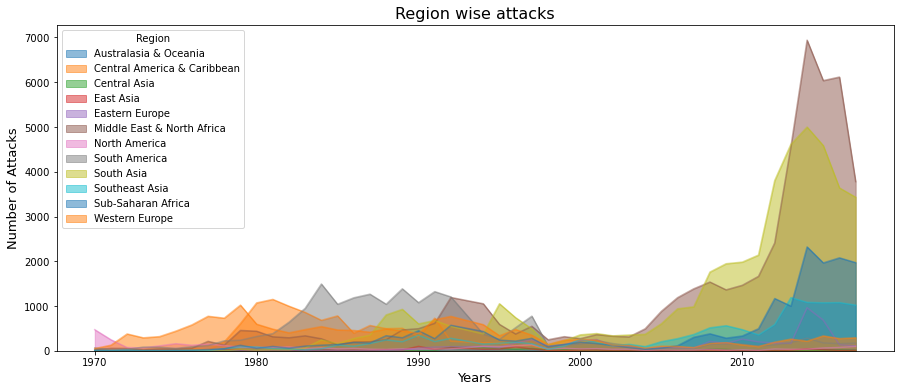

In [23]:
Region.plot(kind = "area", stacked = False, alpha = 0.5, figsize = (15,6))
plt.title("Region wise attacks", fontsize = 16)
plt.xlabel("Years", fontsize = 13)
plt.ylabel("Number of Attacks", fontsize = 13)
plt.show()

#### total terrorist attacks in each region

In [24]:
region_2=data["Region"].value_counts()
region_2

Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Central Asia                     563
Australasia & Oceania            282
Name: Region, dtype: int64

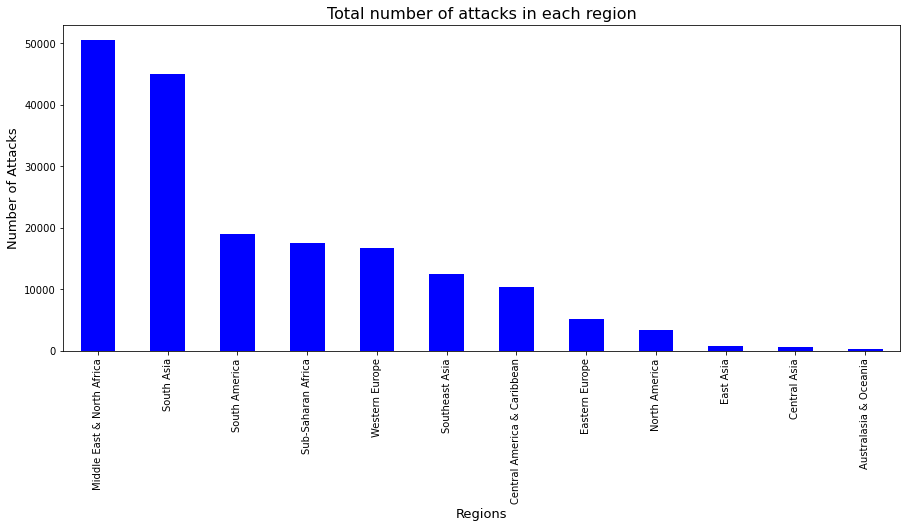

In [25]:
region_2.plot(kind = "bar", figsize = (15,6),colormap="brg")
plt.title("Total number of attacks in each region", fontsize = 16)
plt.xlabel("Regions", fontsize = 13)
plt.ylabel("Number of Attacks", fontsize = 13)
plt.show()

Maximum attacked Region: Middle East and North Africa
    
Minimum attacked Region: Australasia & Oceania 

 #### Total casualities ( Killed + Wounded ) in each region

In [26]:
rc = data[["Region", "Casualities"]].groupby("Region").sum().sort_values(by = "Casualities", ascending = False)
rc

,Casualities
Region,
Middle East & North Africa,351950.0
South Asia,242679.0
Sub-Saharan Africa,131243.0
South America,45553.0
Southeast Asia,41896.0
Central America & Caribbean,37699.0
North America,26447.0
Western Europe,25026.0
Eastern Europe,19460.0


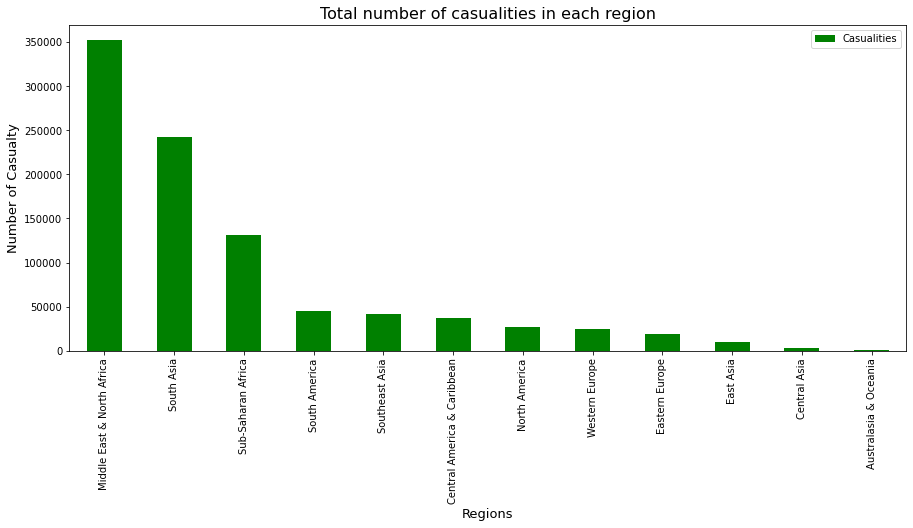

In [27]:
rc.plot(kind = "bar", figsize = (15,6),cmap='ocean')
plt.title("Total number of casualities in each region", fontsize = 16)
plt.xlabel("Regions", fontsize = 13)
plt.ylabel("Number of Casualty", fontsize = 13)
plt.show()

Most number of casualties region: 351950 in Middle East & North Africa
    
Least number of casualties region: 410 in Australasia & Oceania

#### Total killed in each region

In [28]:
kill_region= data[["Region", "kill"]].groupby("Region").sum().sort_values(by = "kill", ascending = False)
kill_region

,kill
Region,
Middle East & North Africa,137642.0
South Asia,101319.0
Sub-Saharan Africa,78386.0
South America,28849.0
Central America & Caribbean,28708.0
Southeast Asia,15637.0
Eastern Europe,7415.0
Western Europe,6694.0
North America,4916.0


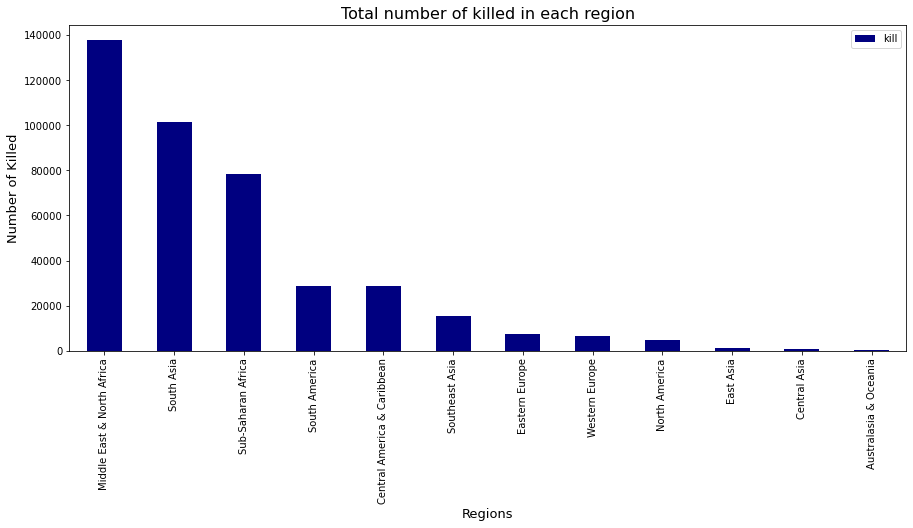

In [29]:
kill_region.plot(kind = "bar", figsize = (15,6),cmap='jet')
plt.title("Total number of killed in each region", fontsize = 16)
plt.xlabel("Regions", fontsize = 13)
plt.ylabel("Number of Killed", fontsize = 13)
plt.show()

Maximum killed in region: 137642 in Middle East & North Africa
    
Minimum killed in region: 150 in Australasia & Oceania

#### Wounded in each region

In [30]:
wound_region= data[["Region", "Wound"]].groupby("Region").sum().sort_values(by = "Wound", ascending = False)
wound_region

,Wound
Region,
Middle East & North Africa,214308.0
South Asia,141360.0
Sub-Saharan Africa,52857.0
Southeast Asia,26259.0
North America,21531.0
Western Europe,18332.0
South America,16704.0
Eastern Europe,12045.0
East Asia,9213.0


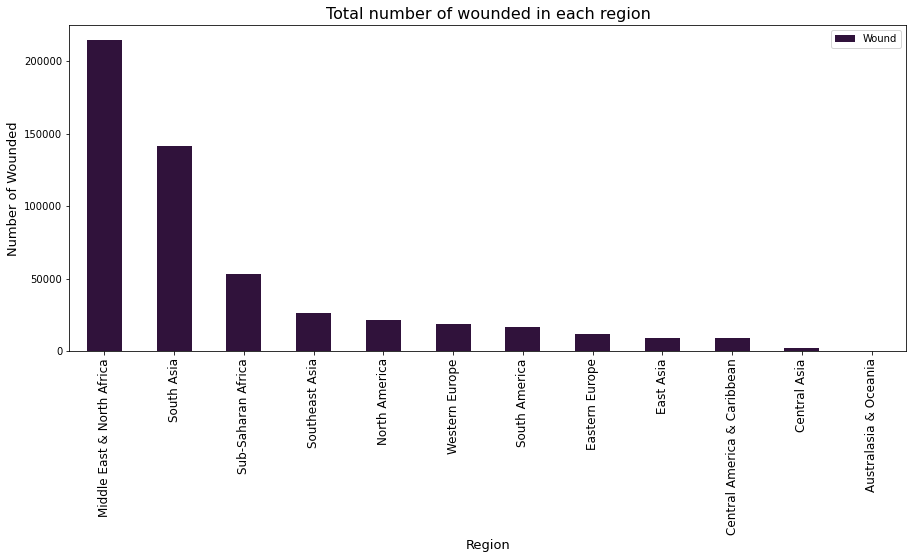

In [31]:
wound_region.plot(kind = "bar", figsize = (15,6),cmap='turbo')
plt.title("Total number of wounded in each region", fontsize = 16)
plt.xlabel("Region", fontsize = 13)
plt.xticks(fontsize = 12)
plt.ylabel("Number of Wounded", fontsize = 13)
plt.show()

Maximum wounded in Middle East and North Africa

Minimum wounded in Australasia and Oceania

#### Number of attacks in each country(Top 10)

In [32]:
Country_t = data["Country"].value_counts()
Country_t=Country_t.head(10)

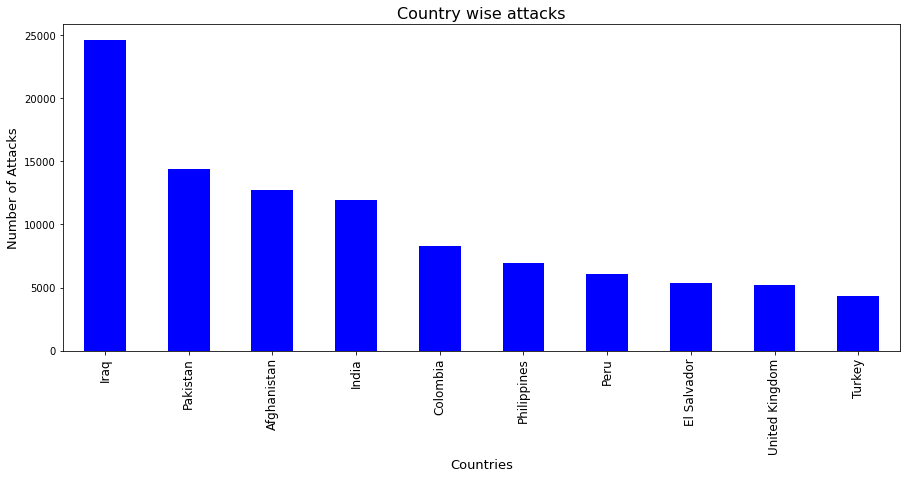

In [33]:
Country_t.plot(kind = "bar", figsize = (15,6),cmap='brg')
plt.title("Country wise attacks", fontsize = 16)
plt.xlabel("Countries", fontsize = 13)
plt.xticks(fontsize = 12)
plt.ylabel("Number of Attacks", fontsize = 13)
plt.show()

Maximum attacks in Iraq followed by Pakistan and Afghanistan

#### Total casualties ( killed + wounded ) in each country

In [34]:
cnc = data[["Country", "Casualities"]].groupby("Country").sum().sort_values(by = "Casualities", ascending = False).head(10)
cnc


,Casualities
Country,
Iraq,213279.0
Afghanistan,83661.0
Pakistan,65860.0
India,48321.0
Nigeria,32921.0
Sri Lanka,31091.0
Syria,29338.0
Colombia,25026.0
United States,24473.0


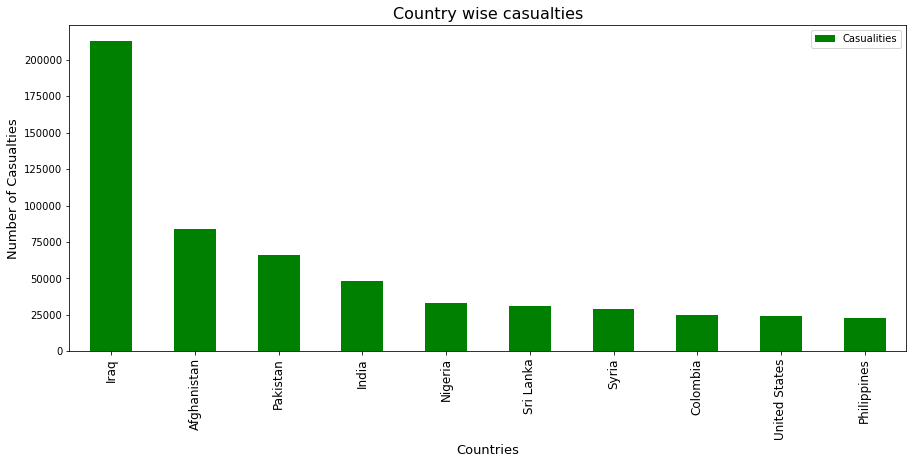

In [35]:
cnc.plot(kind = "bar", figsize = (15,6),cmap='ocean')
plt.title("Country wise casualties", fontsize = 16)
plt.xlabel("Countries", fontsize = 13)
plt.xticks(fontsize = 12)
plt.ylabel("Number of Casualties", fontsize = 13)
plt.show()

Maximum number of Casualities in Iraq followed by Afghanistan and Pakistan 

In [36]:
cnk = data[["Country", "kill"]].groupby("Country").sum().sort_values(by = "kill", ascending = False).head(10)
cnk

,kill
Country,
Iraq,78589.0
Afghanistan,39384.0
Pakistan,23822.0
Nigeria,22682.0
India,19341.0
Sri Lanka,15530.0
Syria,15229.0
Colombia,14698.0
Peru,12771.0


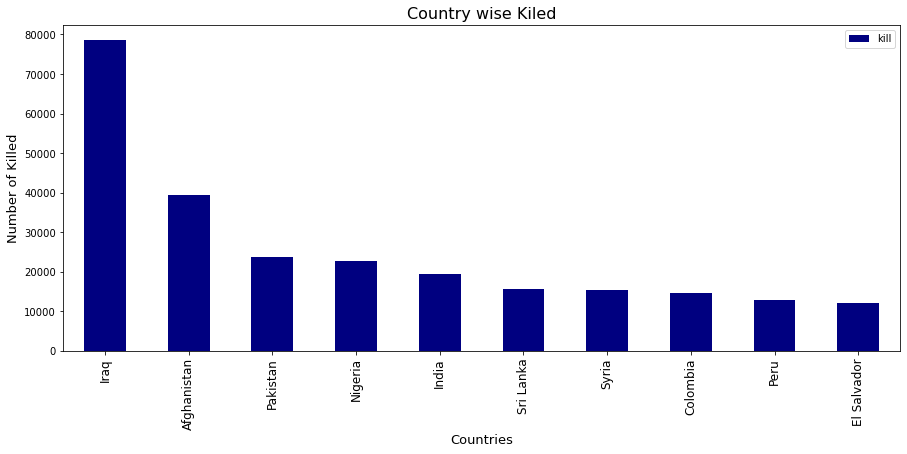

In [37]:
cnk.plot(kind = "bar", figsize = (15,6),cmap='jet')
plt.title("Country wise Kiled", fontsize = 16)
plt.xlabel("Countries", fontsize = 13)
plt.xticks(fontsize = 12)
plt.ylabel("Number of Killed", fontsize = 13)
plt.show()

Most number of people killed: 78589 in Iraq followed by Afghanistan and Pakistan

#### Number of Attacks in Cities(Top 10)

In [38]:
City_t = data["City"].value_counts().drop("Unknown").head(10)
City_t

Baghdad         7589
Karachi         2652
Lima            2359
Mosul           2265
Belfast         2171
Santiago        1621
Mogadishu       1581
San Salvador    1558
Istanbul        1048
Athens          1019
Name: City, dtype: int64

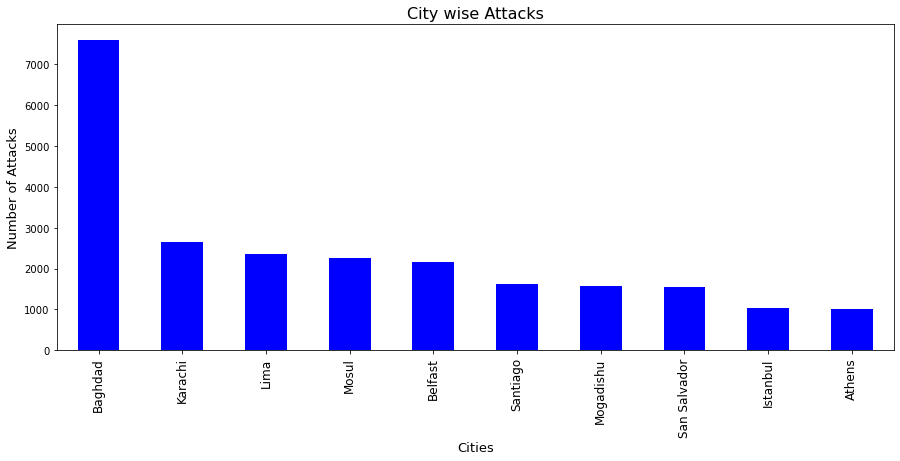

In [39]:
City_t.plot(kind = "bar", figsize = (15,6),cmap='brg')
plt.title("City wise Attacks", fontsize = 16)
plt.xlabel("Cities", fontsize = 13)
plt.xticks(fontsize = 12)
plt.ylabel("Number of Attacks", fontsize = 13)
plt.show()

Maximum  attacks in Baghdad 7589 followed by Karachi,Lima, Mosul,and Belfast

#### Total casualties ( killed + wounded ) in each city

In [40]:
cc = data[["City", "Casualities"]].groupby("City").sum().sort_values(by = "Casualities",ascending = False).drop("Unknown").head(10)
cc

,Casualities
City,
Baghdad,77876.0
New York City,19619.0
Mosul,12927.0
Karachi,9376.0
Mogadishu,8868.0
Kabul,8466.0
Beirut,7257.0
Kirkuk,6636.0
Colombo,5906.0


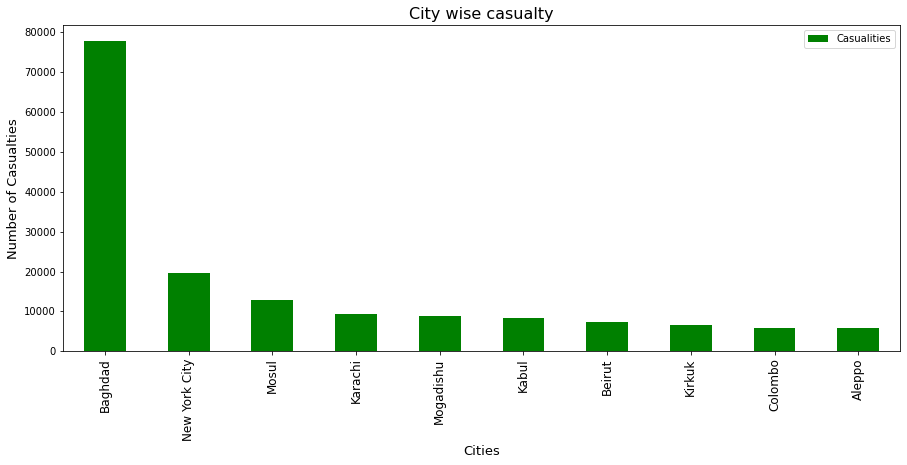

In [41]:
cc.plot(kind = "bar", figsize = (15,6),cmap='ocean')
plt.title("City wise casualty", fontsize = 16)
plt.xlabel("Cities", fontsize = 13)
plt.xticks(fontsize = 12)
plt.ylabel("Number of Casualties", fontsize = 13)
plt.show()

Maximum casualities (kill + wound) in Baghdad  77876 followed by New York City,Mosul and Karachi.

#### Number of Attacks by Terrorist Groups (Top 10)

In [42]:
group = data["Group"].value_counts().drop("Unknown").head(10)
group

Taliban                                             7478
Islamic State of Iraq and the Levant (ISIL)         5613
Shining Path (SL)                                   4555
Farabundo Marti National Liberation Front (FMLN)    3351
Al-Shabaab                                          3288
New People's Army (NPA)                             2772
Irish Republican Army (IRA)                         2671
Revolutionary Armed Forces of Colombia (FARC)       2487
Boko Haram                                          2418
Kurdistan Workers' Party (PKK)                      2310
Name: Group, dtype: int64

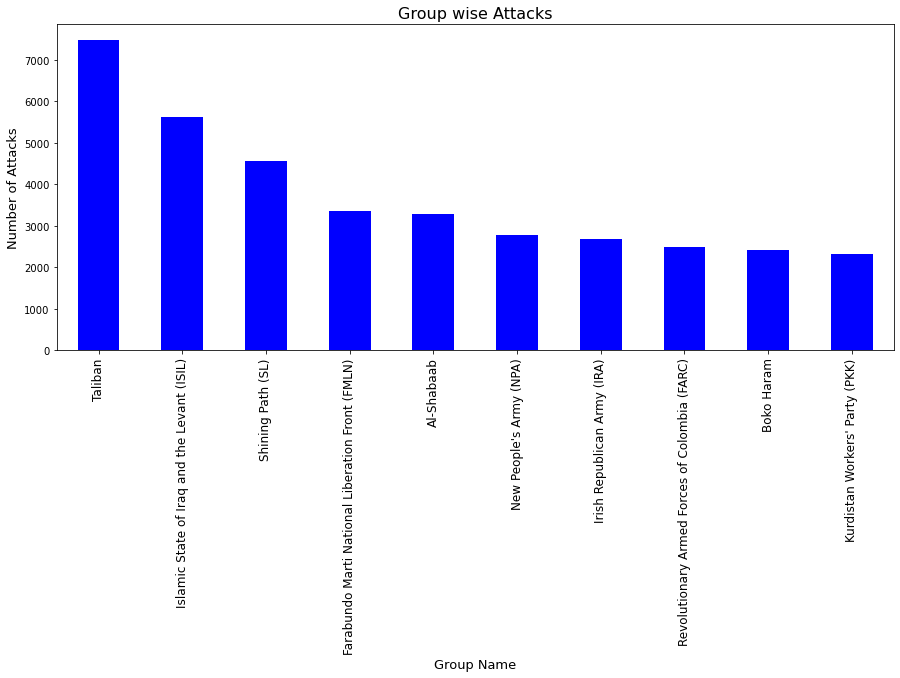

In [44]:
group.plot(kind = "bar", figsize = (15,6),cmap='brg')
plt.title("Group wise Attacks", fontsize = 16)
plt.xlabel("Group Name", fontsize = 13)
plt.xticks(fontsize = 12)
plt.ylabel("Number of Attacks", fontsize = 13)
plt.show()

Most number of attacks : 7478 by Taliban.
    
Least number of attacks : 2418 by "Boko Haram"

####  Total casualties ( killed + wounded ) by each group

In [45]:
gc = data[["Group", "Casualities"]].groupby("Group").sum().sort_values(by = "Casualities", ascending = False).drop("Unknown").head(10)
gc


,Casualities
Group,
Islamic State of Iraq and the Levant (ISIL),69595.0
Taliban,57342.0
Boko Haram,29801.0
Al-Qaida,28372.0
Liberation Tigers of Tamil Eelam (LTTE),22020.0
Al-Shabaab,16954.0
Tehrik-i-Taliban Pakistan (TTP),15574.0
Al-Qaida in Iraq,14724.0
Shining Path (SL),14632.0


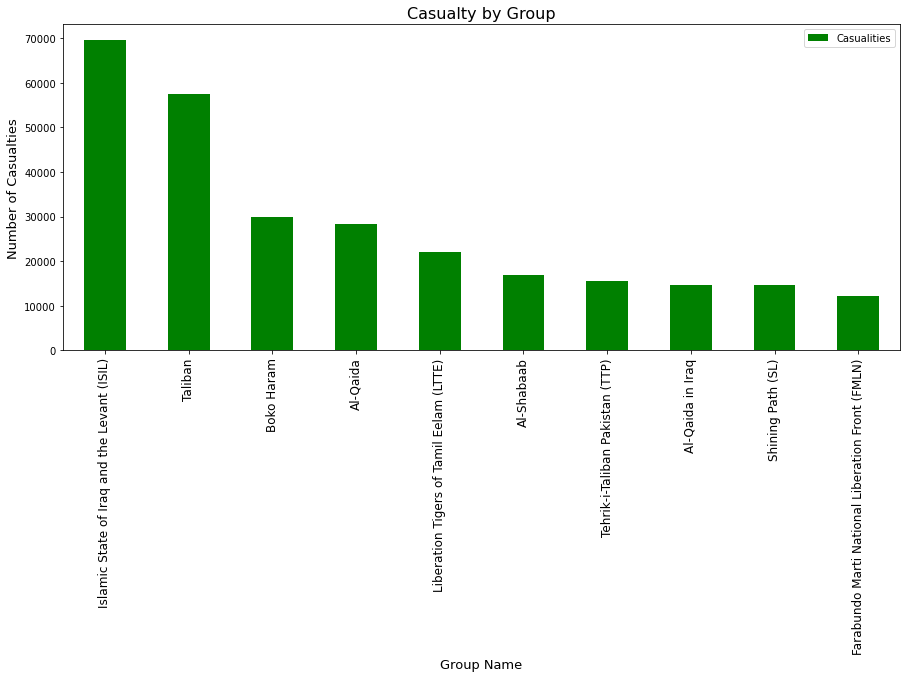

In [46]:
gc.plot(kind = "bar", figsize = (15,6),cmap='ocean')
plt.title("Casualty by Group", fontsize = 16)
plt.xlabel("Group Name", fontsize = 13)
plt.xticks(fontsize = 12)
plt.ylabel("Number of Casualties", fontsize = 13)
plt.show()

Most number of casualties : 69595 by Islamic State of Iraq and the Levant (ISIL)
    
Least number of casualties : 12130 by Farabundo Marti National Liberation Front (FMLN)

#### Number of Attacks by each Attack type

In [47]:
Attack_type = data["Attacktype"].value_counts()
Attack_type

Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: Attacktype, dtype: int64

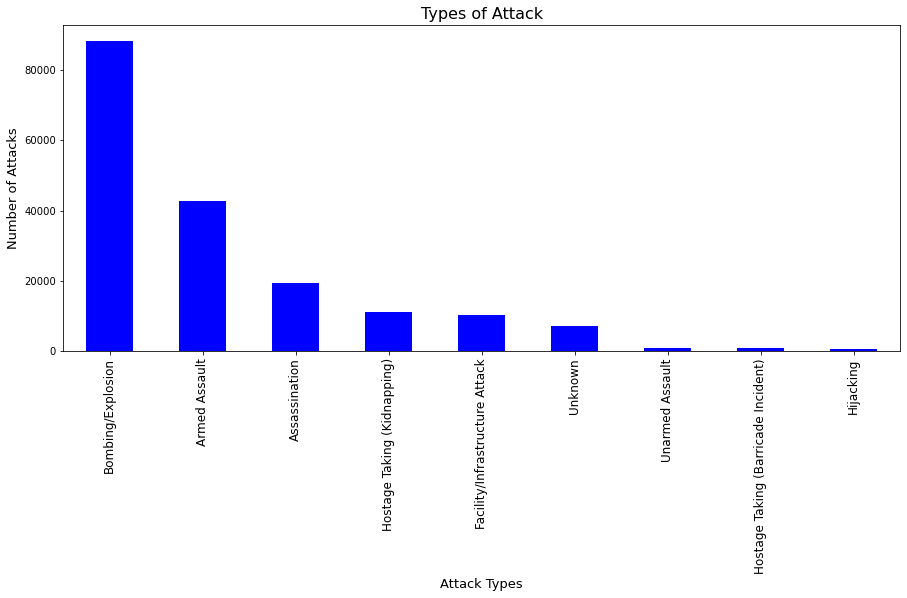

In [48]:
Attack_type.plot(kind = "bar", figsize = (15,6),cmap='brg')
plt.title("Types of Attack", fontsize = 16)
plt.xlabel("Attack Types", fontsize = 13)
plt.xticks(fontsize = 12)
plt.ylabel("Number of Attacks", fontsize = 13)
plt.show()

Most number of attacks : 88255 by Bombing/Explosion  

Least number of attacks : 659 by Hijacking

#### Total casualities ( killed + wounded ) by each attack type

In [49]:
ac = data[["Attacktype", "Casualities"]].groupby("Attacktype").sum().sort_values(by = "Casualities", ascending = False)
ac


,Casualities
Attacktype,
Bombing/Explosion,530007.0
Armed Assault,237663.0
Unknown,47106.0
Assassination,38807.0
Hostage Taking (Kidnapping),30677.0
Hijacking,20719.0
Unarmed Assault,14907.0
Hostage Taking (Barricade Incident),8444.0
Facility/Infrastructure Attack,7407.0


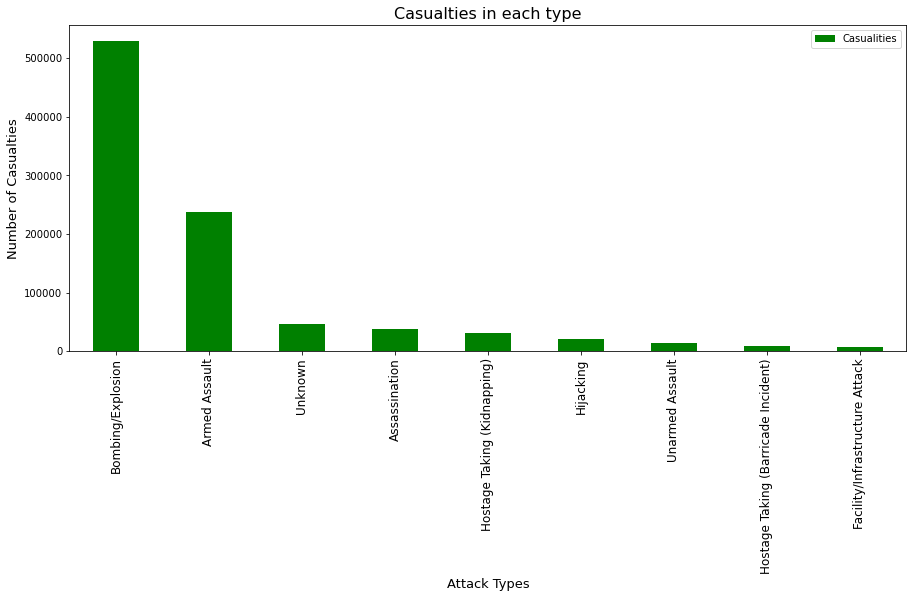

In [50]:
ac.plot(kind = "bar", figsize = (15,6),cmap='ocean')
plt.title("Casualties in each type", fontsize = 16)
plt.xlabel("Attack Types", fontsize = 13)
plt.xticks(fontsize = 12)
plt.ylabel("Number of Casualties", fontsize = 13)
plt.show()

Most number of casualties : 530007 by Bombing/Explosion.
    
Least number of casualties : 7407 by Facility/Infrastructure Attack

#### Total killed by each attack type

In [51]:
ak = data[["Attacktype", "kill"]].groupby("Attacktype").sum().sort_values(by = "kill", ascending = False)
ak

,kill
Attacktype,
Armed Assault,160297.0
Bombing/Explosion,157321.0
Unknown,32381.0
Assassination,24920.0
Hostage Taking (Kidnapping),24231.0
Hostage Taking (Barricade Incident),4478.0
Hijacking,3718.0
Facility/Infrastructure Attack,3642.0
Unarmed Assault,880.0


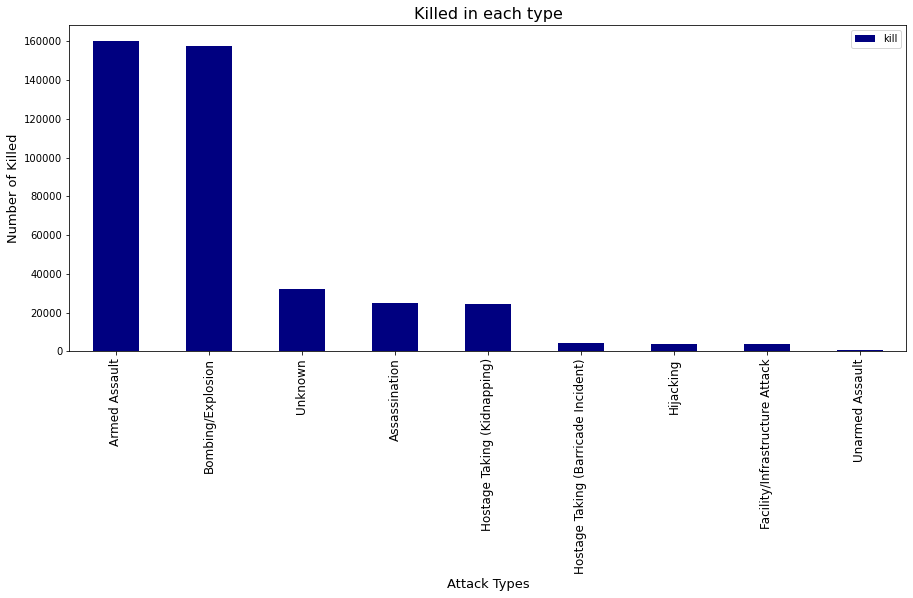

In [52]:
ak.plot(kind = "bar", figsize = (15,6),cmap='jet')
plt.title("Killed in each type", fontsize = 16)
plt.xlabel("Attack Types", fontsize = 13)
plt.xticks(fontsize = 12)
plt.ylabel("Number of Killed", fontsize = 13)
plt.show()

Most number of people killed : 160297 by Armed Assault
    
Least number of people killed : 880 by Unarmed Assault

#### Number of attacks by each target type

In [53]:
Target_type = data["Targettype"].value_counts()
Target_type

Private Citizens & Property       43511
Military                          27984
Police                            24506
Government (General)              21283
Business                          20669
Transportation                     6799
Utilities                          6023
Unknown                            5898
Religious Figures/Institutions     4440
Educational Institution            4322
Government (Diplomatic)            3573
Terrorists/Non-State Militia       3039
Journalists & Media                2948
Violent Political Party            1866
Airports & Aircraft                1343
Telecommunication                  1009
NGO                                 970
Tourists                            440
Maritime                            351
Food or Water Supply                317
Abortion Related                    263
Other                               137
Name: Targettype, dtype: int64

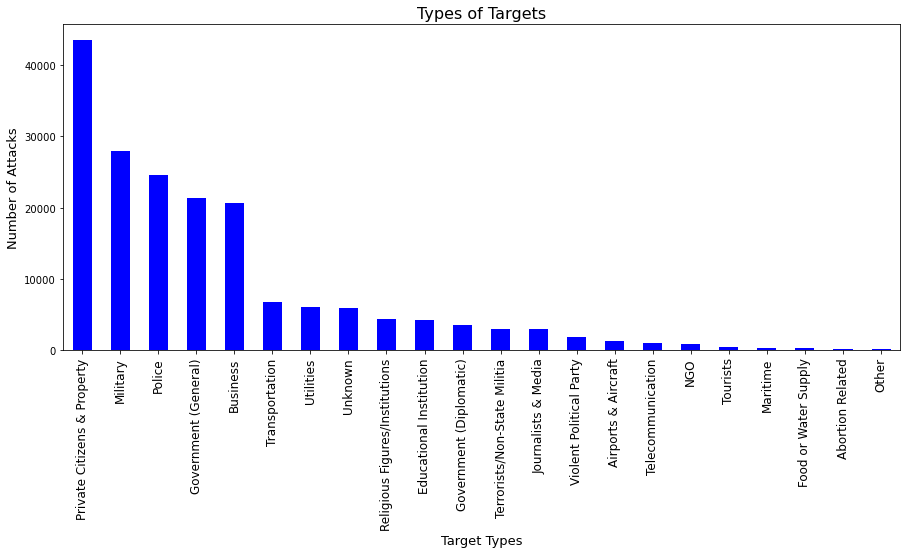

In [54]:
Target_type.plot(kind = "bar", figsize = (15,6),cmap="brg")
plt.title("Types of Targets", fontsize = 16)
plt.xlabel("Target Types", fontsize = 13)
plt.xticks(fontsize = 12)
plt.ylabel("Number of Attacks", fontsize = 13)
plt.show()

Most number of attacks : 43511 over Private Citizens & Property
    
Least number of attacks : 263 over Abortion Related

In [55]:
tc = data[["Targettype", "Casualities"]].groupby("Targettype").sum().sort_values(by = "Casualities", ascending = False)
tc

,Casualities
Targettype,
Private Citizens & Property,319176.0
Military,177085.0
Police,118407.0
Business,78018.0
Government (General),67255.0
Transportation,54595.0
Religious Figures/Institutions,37890.0
Terrorists/Non-State Militia,17311.0
Educational Institution,13972.0


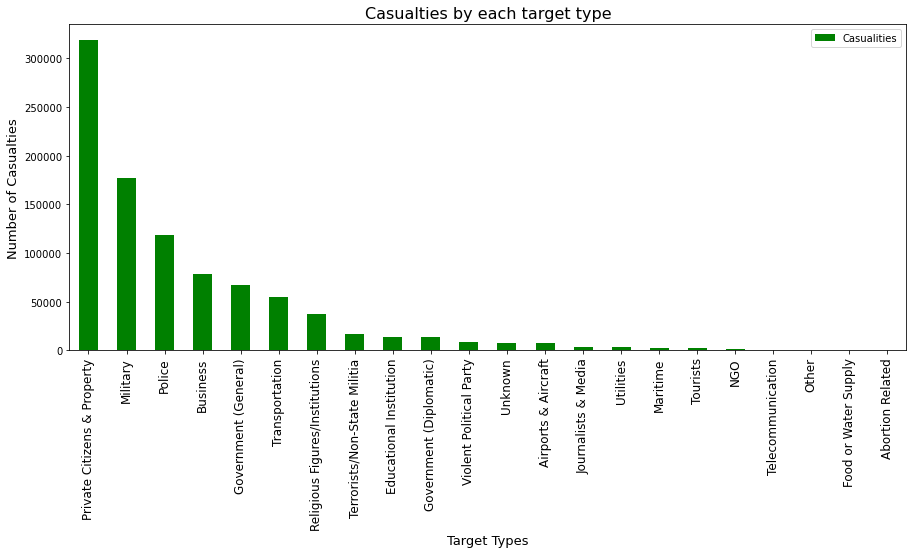

In [56]:
tc.plot(kind = "bar", figsize = (15,6),cmap='ocean')
plt.title("Casualties by each target type", fontsize = 16)
plt.xlabel("Target Types", fontsize = 13)
plt.xticks(fontsize = 12)
plt.ylabel("Number of Casualties", fontsize = 13)
plt.show()

Most number of casualties : 319176 over Private Citizens & Property
    
Least number of casualties : 56 over Abortion Related

In [57]:
tk = data[["Targettype", "kill"]].groupby("Targettype").sum().sort_values(by = "kill", ascending = False)
tk

,kill
Targettype,
Private Citizens & Property,140504.0
Military,106047.0
Police,53704.0
Government (General),26071.0
Business,23487.0
Transportation,13916.0
Religious Figures/Institutions,13413.0
Terrorists/Non-State Militia,9088.0
Unknown,4329.0


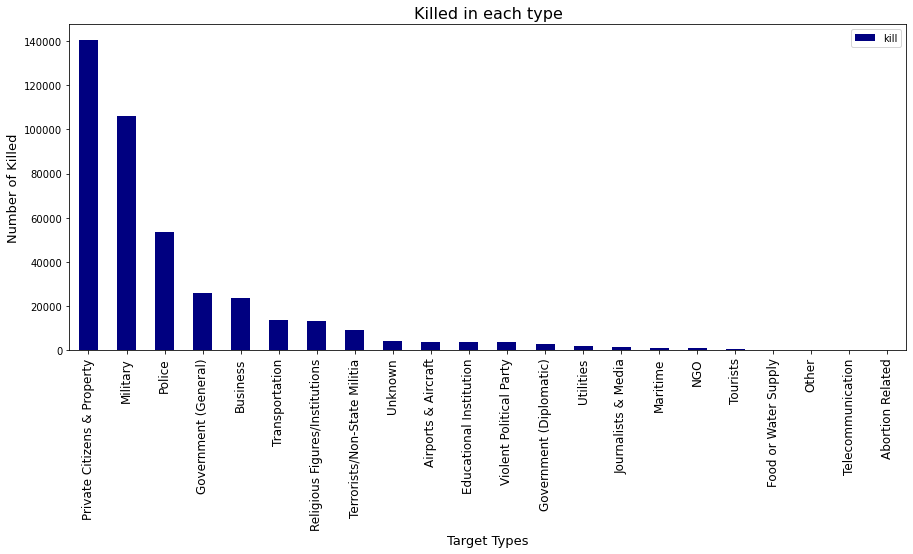

In [58]:
tk.plot(kind = "bar", figsize = (15,6),cmap="jet")
plt.title("Killed in each type", fontsize = 16)
plt.xlabel("Target Types", fontsize = 13)
plt.xticks(fontsize = 12)
plt.ylabel("Number of Killed", fontsize = 13)
plt.show()

Most number of people killed : 140504 over Private Citizens & Property
    
Least number of people killed : 10 over Abortion Related

#### Number of Attacks by group and Country wise

In [59]:
gca = data[["Group","Country"]].value_counts().drop("Unknown").head(10)
gca

Group                                             Country       
Taliban                                           Afghanistan       7423
Islamic State of Iraq and the Levant (ISIL)       Iraq              4797
Shining Path (SL)                                 Peru              4541
Farabundo Marti National Liberation Front (FMLN)  El Salvador       3330
Al-Shabaab                                        Somalia           2867
New People's Army (NPA)                           Philippines       2770
Irish Republican Army (IRA)                       United Kingdom    2575
Revolutionary Armed Forces of Colombia (FARC)     Colombia          2468
Kurdistan Workers' Party (PKK)                    Turkey            2109
Boko Haram                                        Nigeria           2087
dtype: int64

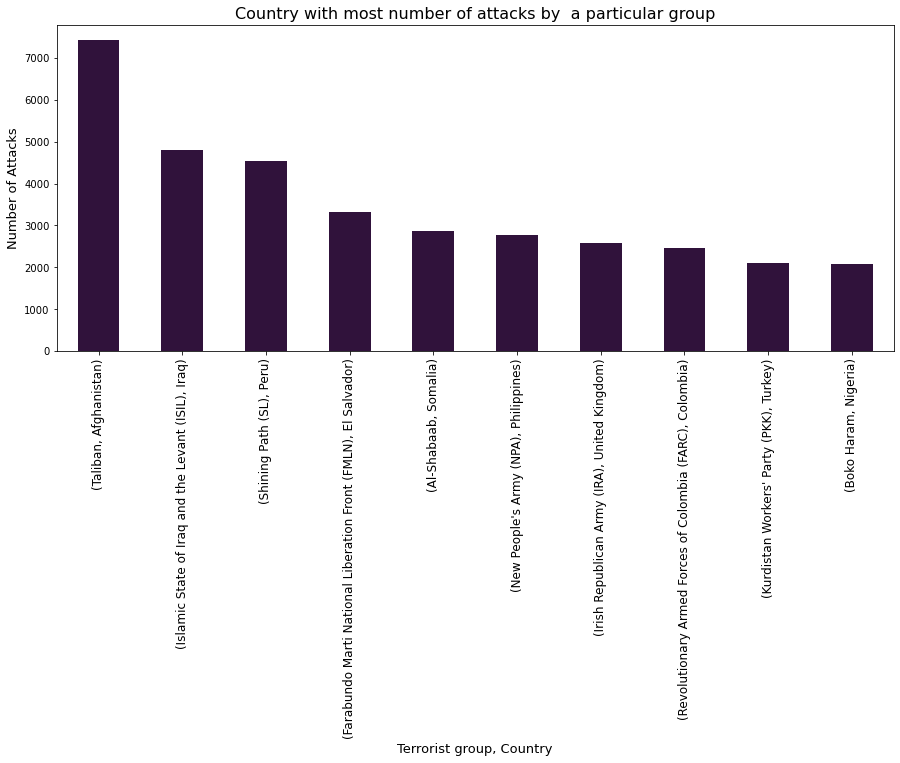

In [60]:
gca.plot(kind = "bar", figsize = (15,6),cmap="turbo")
plt.title("Country with most number of attacks by  a particular group", fontsize = 16)
plt.xlabel("Terrorist group, Country", fontsize = 13)
plt.xticks(fontsize = 12)
plt.ylabel("Number of Attacks", fontsize = 13)
plt.show()

Most number of attacks : 7423 by Taliban in Afghanistan
    
Least number of attacks : 2087 by Boko Haram in Nigeria

#### Casuaities

In [61]:
gcc = data[["Group", "Country", "Casualities"]].groupby(["Group", "Country"], axis=0).sum().sort_values(by = "Casualities", ascending = False).drop("Unknown").head(10)
gcc

,,Casualities
Group,Country,
Taliban,Afghanistan,57140.0
Islamic State of Iraq and the Levant (ISIL),Iraq,54755.0
Boko Haram,Nigeria,24588.0
Liberation Tigers of Tamil Eelam (LTTE),Sri Lanka,21919.0
Al-Qaida,United States,19494.0
Tehrik-i-Taliban Pakistan (TTP),Pakistan,15532.0
Shining Path (SL),Peru,14625.0
Al-Qaida in Iraq,Iraq,14348.0
Al-Shabaab,Somalia,14201.0


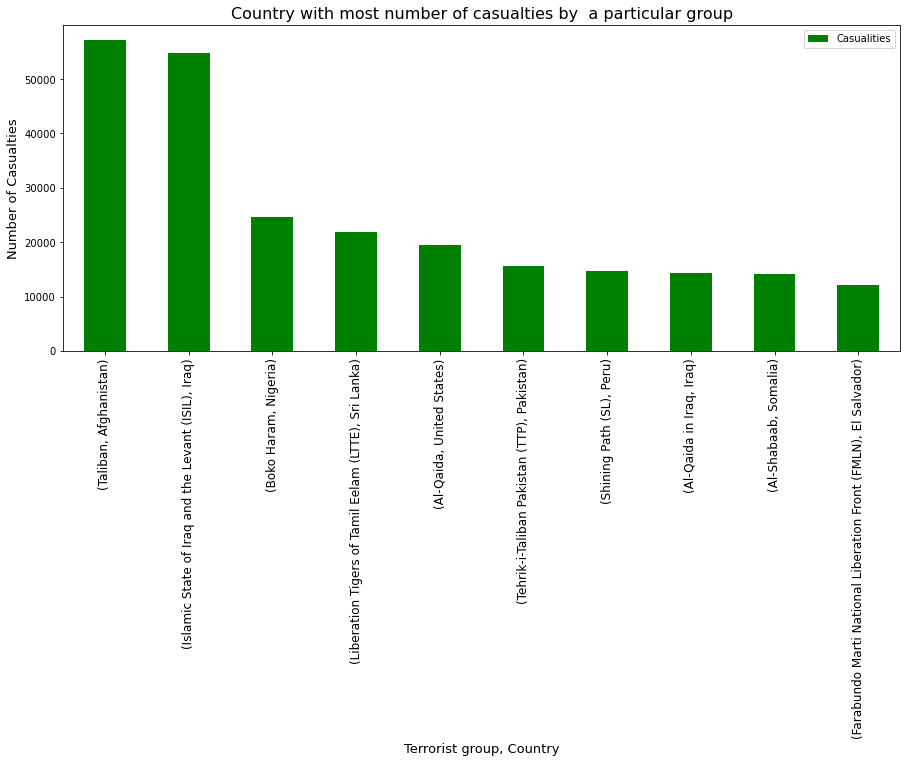

In [62]:
gcc.plot(kind = "bar", figsize = (15,6),cmap='ocean')
plt.title("Country with most number of casualties by  a particular group", fontsize = 16)
plt.xlabel("Terrorist group, Country", fontsize = 13)
plt.xticks(fontsize = 12)
plt.ylabel("Number of Casualties", fontsize = 13)
plt.show()

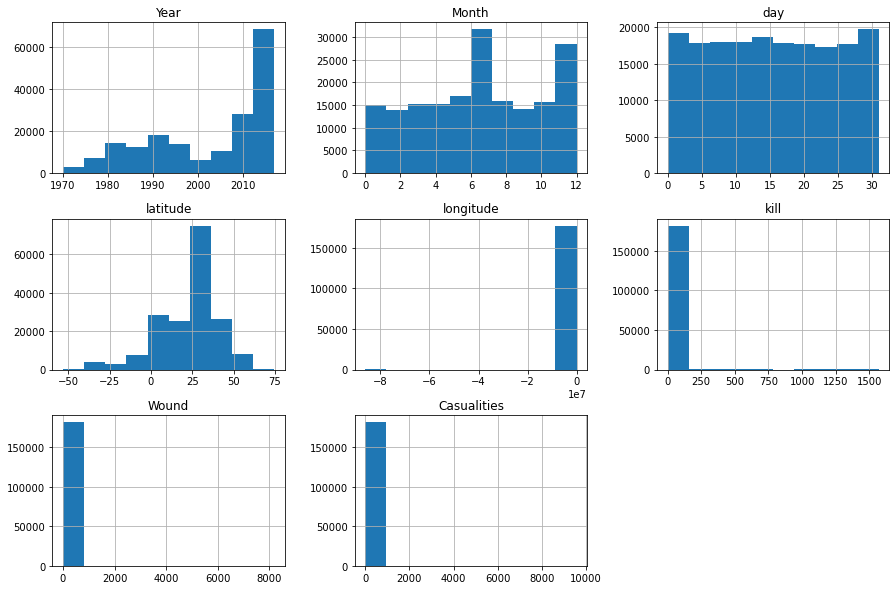

In [63]:
data.hist(figsize=(15,10));

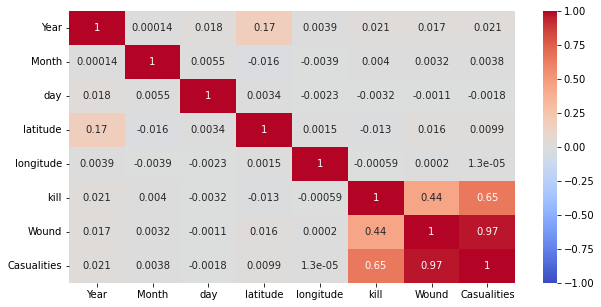

In [64]:
plt.figure(figsize=(10,5))
sns.heatmap(data.corr(), vmin=-1, cmap='coolwarm', annot=True);

## OBSERVATIONS

We can see by analysis not even a single part of world is untouched by the terrosit attacks. This has become a serious concern for humanity.

#### Total number of Casualties due to Terrorist Attacks from 1970 to 2017 across the World : 935737
    
#### Total number of killed due to  Terrorist Attacks from 1970 to 2017 across the world : 411868
    
#### Total number of wounded due to Terrorist Attacks from 1970 to 2017 across the world : 523869
    
#### Maximum Attacks occur in 2014.

#### Middle East and North Africa region was most the attacked.

#### Iraq is the most attacked country followed by Pakistan and Afghanistan.

#### Maximum attacks occur in Baghdad city folwed by Karachi and Lima.

#### Terrorist group Taliban was responsible for maximum Attacks followed by Islamic State of Iraq.

#### Maximum number of Attacks were Bombing and Explosion and Armed Assaults and the target was Private Citizens and Property most of the times

#### Taliban Group attacked Afghanistan maximum times.




    

All the world leaders should come together and make a strong law agains terrorism,as it is the obstacle in way of human developmen